# Analyzing an initial dataset
We are starting with an archive of the datascience stackexchange questions. Let's quckly walk through the dataset. First, we will load the data.

Before being able to load the csv, make sure you have pre-processed the raw xml using our python package.

In [1]:
import json

from tqdm import tqdm
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ElT
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

df = pd.DataFrame.from_csv('data/writers.csv')


/Users/emmanuel.ameisen/ml_editor/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  del sys.path[0]
/Users/emmanuel.ameisen/ml_editor/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


## Data format

We transformed our data from xml to structured csv. 

How are we going to structure it in order to have labels for our model?

We need to measure the quality of a question. For that, we could:
- Use the number of upvotes a question gets
- Use the number of answers a question gets, or whether they get an answer at all
- Use whether an answer was marked as accepted or not

Let's look at each potential category, and their tradeoffs.

In [2]:
# How many questions do we have
# How many questions have answers, and how many answers per question on avg

df['AnswerCount'] = df['AnswerCount'].fillna(-1)
df["AnswerCount"] = df["AnswerCount"].astype(int)

df['PostTypeId'] = df['PostTypeId'].astype(int)
df['Id'] = df['Id'].astype(int)

df['is_question'] = df['PostTypeId'] == 1
df.set_index("Id", inplace=True, drop=False)

In [3]:
# About 25% of questions are unanswered, if we 
df[df['is_question']]["AnswerCount"].value_counts(normalize=True, sort=True)

1     0.239493
2     0.233346
3     0.177268
4     0.114917
5     0.079162
6     0.045164
7     0.032116
8     0.019069
0     0.018065
9     0.011918
10    0.009660
11    0.005144
12    0.004265
13    0.002635
14    0.002258
15    0.001380
16    0.001004
17    0.001004
21    0.000502
25    0.000376
19    0.000376
22    0.000251
24    0.000125
20    0.000125
41    0.000125
18    0.000125
23    0.000125
Name: AnswerCount, dtype: float64

## Data quality

- How much of the data is missing?
- What is the quality of the text?
- Do the answers match the questions?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34330 entries, 1 to 42885
Data columns (total 25 columns):
AcceptedAnswerId         4124 non-null float64
AnswerCount              34330 non-null int64
Body                     34256 non-null object
ClosedDate               969 non-null object
CommentCount             34330 non-null int64
CommunityOwnedDate       186 non-null object
CreationDate             34330 non-null object
FavoriteCount            3307 non-null float64
Id                       34330 non-null int64
LastActivityDate         34330 non-null object
LastEditDate             11201 non-null object
LastEditorDisplayName    614 non-null object
LastEditorUserId         10648 non-null float64
OwnerDisplayName         1976 non-null object
OwnerUserId              32792 non-null float64
ParentId                 25679 non-null float64
PostTypeId               34330 non-null int64
Score                    34330 non-null int64
Tags                     7971 non-null object
Title   

We have a little over 31.000 questions. Why is the body sometimes null? 

In [5]:
df[df["Body"].isna()]

,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,LastActivityDate,...,ParentId,PostTypeId,Score,Tags,Title,ViewCount,body_text,text_len,tokenized,is_question
Id,,,,,,,,,,,,,,,,,,,,,
2145,NaN,-1,NaN,NaN,0,NaN,2011-03-22T19:49:56.600,NaN,2145,2011-03-22T19:49:56.600,...,NaN,5,0,NaN,NaN,NaN,NaN,0,[],False
2147,NaN,-1,NaN,NaN,0,NaN,2011-03-22T19:51:05.897,NaN,2147,2011-03-22T19:51:05.897,...,NaN,5,0,NaN,NaN,NaN,NaN,0,[],False
2215,NaN,-1,NaN,NaN,0,NaN,2011-03-24T19:35:10.353,NaN,2215,2011-03-24T19:35:10.353,...,NaN,5,0,NaN,NaN,NaN,NaN,0,[],False
2218,NaN,-1,NaN,NaN,0,NaN,2011-03-24T19:41:38.677,NaN,2218,2011-03-24T19:41:38.677,...,NaN,5,0,NaN,NaN,NaN,NaN,0,[],False
2225,NaN,-1,NaN,NaN,0,NaN,2011-03-24T19:58:59.833,NaN,2225,2011-03-24T19:58:59.833,...,NaN,5,0,NaN,NaN,NaN,NaN,0,[],False
2227,NaN,-1,NaN,NaN,0,NaN,2011-03-24T20:05:07.753,NaN,2227,2011-03-24T20:05:07.753,...,NaN,5,0,NaN,NaN,NaN,NaN,0,[],False
2233,NaN,-1,NaN,NaN,0,NaN,2011-03-24T20:22:44.603,NaN,2233,2011-03-24T20:22:44.603,...,NaN,5,0,NaN,NaN,NaN,NaN,0,[],False
2238,NaN,-1,NaN,NaN,0,NaN,2011-03-24T20:38:42.200,NaN,2238,2011-03-24T20:38:42.200,...,NaN,5,0,NaN,NaN,NaN,NaN,0,[],False
3138,NaN,-1,NaN,NaN,0,NaN,2011-06-19T20:18:13.253,NaN,3138,2011-06-19T20:18:13.253,...,NaN,5,0,NaN,NaN,NaN,NaN,0,[],False


All of the null bodys are of  PostTypeId 4 or 5. The readme file only mentions PostTypeIds of 1 (questions) and 2 (answers). There are 304 rows marked 3 or 4, which we will remove since we do not know what they correspond to.

In [6]:
df[~(df["PostTypeId"].isin([1,2]))]

,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,LastActivityDate,...,ParentId,PostTypeId,Score,Tags,Title,ViewCount,body_text,text_len,tokenized,is_question
Id,,,,,,,,,,,,,,,,,,,,,
1024,NaN,-1,<p>Anyone who hasn't been to any Stack Exchang...,NaN,0,NaN,2011-01-04T22:49:12.333,NaN,1024,2013-04-30T15:48:37.273,...,NaN,7,0,NaN,NaN,NaN,Anyone who hasn't been to any Stack Exchange s...,594,"[['Anyone', 'who', 'has', ""n't"", 'been', 'to',...",False
1885,NaN,-1,"<p>""Technique"" is literally a method, a way of...",NaN,0,NaN,2011-03-06T06:10:34.393,NaN,1885,2011-03-06T18:52:42.467,...,NaN,5,0,NaN,NaN,NaN,"""Technique"" is literally a method, a way of do...",229,"[['``', 'Technique', ""''"", 'is', 'literally', ...",False
1886,NaN,-1,"Common, repeatable methods of achieving partic...",NaN,0,NaN,2011-03-06T06:10:34.393,NaN,1886,2011-03-06T18:52:54.730,...,NaN,4,0,NaN,NaN,NaN,"Common, repeatable methods of achieving partic...",15,"[['Common', ',', 'repeatable', 'methods', 'of'...",False
1987,NaN,-1,<h2>Critique Guidelines</h2>\n\n<p>Critique re...,NaN,0,NaN,2011-03-14T17:35:34.010,NaN,1987,2012-05-01T03:56:24.657,...,NaN,5,0,NaN,NaN,NaN,Critique Guidelines\nCritique requests are ext...,185,"[['Critique', 'Guidelines', 'Critique', 'reque...",False
1988,NaN,-1,TAG IS SOON TO BE DEPRECIATED. Please use tags...,NaN,0,NaN,2011-03-14T17:35:34.010,NaN,1988,2012-05-01T19:26:10.927,...,NaN,4,0,NaN,NaN,NaN,TAG IS SOON TO BE DEPRECIATED. Please use tags...,25,"[['TAG', 'IS', 'SOON', 'TO', 'BE', 'DEPRECIATE...",False
2141,NaN,-1,"<p>This tag is not in use, due to its ambiguou...",NaN,0,NaN,2011-03-22T19:14:57.783,NaN,2141,2011-03-22T19:16:17.910,...,NaN,3,0,NaN,NaN,NaN,"This tag is not in use, due to its ambiguous n...",93,"[['This', 'tag', 'is', 'not', 'in', 'use', ','...",False
2142,NaN,-1,"This tag is not in use, due to its ambiguous n...",NaN,0,NaN,2011-03-22T19:14:57.783,NaN,2142,2011-03-22T19:16:18.940,...,NaN,3,0,NaN,NaN,NaN,"This tag is not in use, due to its ambiguous n...",35,"[['This', 'tag', 'is', 'not', 'in', 'use', ','...",False
2145,NaN,-1,NaN,NaN,0,NaN,2011-03-22T19:49:56.600,NaN,2145,2011-03-22T19:49:56.600,...,NaN,5,0,NaN,NaN,NaN,NaN,0,[],False
2146,NaN,-1,Citations are references to published or unpub...,NaN,0,NaN,2011-03-22T19:49:56.600,NaN,2146,2011-03-22T19:49:56.600,...,NaN,4,0,NaN,NaN,NaN,Citations are references to published or unpub...,37,"[['Citations', 'are', 'references', 'to', 'pub...",False


In [7]:
# Filtering out PostTypeIds other than documented ones
df = df[df["PostTypeId"].isin([1,2])]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33650 entries, 1 to 42885
Data columns (total 25 columns):
AcceptedAnswerId         4124 non-null float64
AnswerCount              33650 non-null int64
Body                     33650 non-null object
ClosedDate               969 non-null object
CommentCount             33650 non-null int64
CommunityOwnedDate       186 non-null object
CreationDate             33650 non-null object
FavoriteCount            3307 non-null float64
Id                       33650 non-null int64
LastActivityDate         33650 non-null object
LastEditDate             10521 non-null object
LastEditorDisplayName    606 non-null object
LastEditorUserId         9975 non-null float64
OwnerDisplayName         1971 non-null object
OwnerUserId              32117 non-null float64
ParentId                 25679 non-null float64
PostTypeId               33650 non-null int64
Score                    33650 non-null int64
Tags                     7971 non-null object
Title    

Now let's look at questions and accepted answers and see if they match!

In [9]:
questions_with_accepted_answers = df[df["is_question"] & ~(df["AcceptedAnswerId"].isna())]
q_and_a = questions_with_accepted_answers.join(df[["body_text"]], on='AcceptedAnswerId', how='left', rsuffix="_answer")

pd.options.display.max_colwidth = 500
q_and_a[["body_text", "body_text_answer"]][:5]

,body_text,body_text_answer
Id,,
1,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n","When I'm thinking about where I learned most how to write, I think that reading was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I need when re..."
2,"What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?\nFor example, writing in the first person you are always following a character, while in the third person you can ""jump"" between story lines.\n","With a story in first person, you are intending the reader to become much more attached to the main character. Since the reader sees what that character sees and feels what that character feels, the reader will have an emotional investment in that character. Third person does not have this close tie; a reader can become emotionally invested but it will not be as strong as it will be in first person.\nContrarily, you cannot have multiple point characters when you use first person without ex..."
3,"I finished my novel, and everyone I've talked to says I need an agent. How do I find one?\n","Try and find a list of agents who write in your genre. Check out their websites!\nFind out if they are accepting new clients. If they aren't, then check out another agent. But if they are, try sending them a few chapters from your story, a brief, and a short cover letter asking them to represent you.\nIn the cover letter mention your previous publication credits. If sent via post, then I suggest you give them a means of reply, whether it be an email or a stamped, addressed envelope.\nAgents ..."
7,"I keep hearing about literary fiction, and how it is so much better than genre fiction. What exactly is literary fiction?\n","There's always the good old wikipedia definition: http://en.wikipedia.org/wiki/Literary_fiction\nMy take on it is that it is often used to mean ""serious"" fiction (whatever that is), as opposed to fiction that is merely ""entertainment"". It often seems to be thrown about in the context of snobbery (that is, someone may not ""read that airport bookshop rubbish"" because they like literary fiction), but I don't know if people really say those sorts of things, or if it's just the impression that th..."
11,I heard a writer talking about pantsing a story. What does that mean?\n,"""Pantsing"" refers to simply writing a story without much, if any, preparation or pre-writing -- just writing down whatever comes to you, and letting the story go (and wander) wherever it feels like at the moment you're writing it down.\nAs for etymology, I'm not sure where it comes from. In general, ""pantsing"" refers to a prank in which you pull someone's pants down, but I'm not sure how that plays into the idea of writing (aside from the fact that both can be surprising).\n"


So far so good, and the text seems good except for potentially unescaped newlines characters ("\n")

In [10]:
df[["body_text", "ParentId"]]

,body_text,ParentId
Id,,
1,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n",NaN
2,"What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?\nFor example, writing in the first person you are always following a character, while in the third person you can ""jump"" between story lines.\n",NaN
3,"I finished my novel, and everyone I've talked to says I need an agent. How do I find one?\n",NaN
5,"When writing a short-story to highlight a certain truth, is it typically a better practice to construct a point to exemplify through the short-story?\nIn other words, construct the characters, plot and setting based on the point I want to portray, instead of focusing on plot first.\nAlthough, I need to make sure the plot is engaging.\nIs this a good practice?\n",NaN
7,"I keep hearing about literary fiction, and how it is so much better than genre fiction. What exactly is literary fiction?\n",NaN
8,BeginningWriters.com has some good articles for beginning writers.\nhttp://beginningwriters.com/\n,1.0
9,"Whenever I attempt to write something, I do it in a common word processor (like Microsoft Word), but I was wondering if there is a special software for it.\nSomething that would help me keep track of the story lines, times, and characters in an easy and organized way as to not get lost in my own story\n",NaN
10,"If you have a point that you do want to convey, this is certainly a legitimate practice. You shouldn't make artificial points just to have them, however.\nIt is important to ensure that your point does not become too contrived, as well. There are cases where everything should be a microcosm of your main theme, but they are rare, even in a short story. You do need to have a strong plot and characters and setting as well. The point will be lost if the writing falters because of it.\nMany s...",5.0
11,I heard a writer talking about pantsing a story. What does that mean?\n,NaN


In [11]:
print(df.index)

Int64Index([    1,     2,     3,     5,     7,     8,     9,    10,    11,
               14,
            ...
            42876, 42877, 42878, 42879, 42880, 42881, 42882, 42883, 42884,
            42885],
           dtype='int64', name='Id', length=33650)


In [12]:
# Linking questions and answers
# df["id"] = df.index
# to_join = df[["Id", "Title", "body_text", "text_len", "Score", "AcceptedAnswerId"]]
# print(to_join.index)
df = df.join(df[["Id", "Title", "body_text", "text_len", "Score", "AcceptedAnswerId"]], on='ParentId', how='left', rsuffix='_question')


In [13]:
df

,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,LastActivityDate,...,body_text,text_len,tokenized,is_question,Id_question,Title_question,body_text_question,text_len_question,Score_question,AcceptedAnswerId_question
Id,,,,,,,,,,,,,,,,,,,,,
1,15.0,9,"<p>I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.</p>\n\n<p>Are there some resources on how to start becoming a writer?</p>\n\n<p>I'm thinking something with tips and easy exercises to get the ball rolling.</p>\n",NaN,7,NaN,2010-11-18T20:40:32.857,17.0,1,2019-02-10T04:06:33.283,...,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n",61,"[['I', ""'ve"", 'always', 'wanted', 'to', 'start', 'writing', '(', 'in', 'a', 'totally', 'amateur', 'way', ')', ',', 'but', 'whenever', 'I', 'want', 'to', 'start', 'something', 'I', 'instantly', 'get', 'blocked', 'having', 'a', 'lot', 'of', 'questions', 'and', 'doubts', '.'], ['Are', 'there', 'some', 'resources', 'on', 'how', 'to', 'start', 'becoming', 'a', 'writer', '?'], ['I', ""'m"", 'thinking', 'something', 'with', 'tips', 'and', 'easy', 'exercises', 'to', 'get', 'the', 'ball', 'rolling', '.']]",True,NaN,NaN,NaN,NaN,NaN,NaN
2,16.0,7,"<p>What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?</p>\n\n<p>For example, writing in the first person you are always <em>following</em> a character, while in the third person you can ""jump"" between story lines.</p>\n",NaN,0,NaN,2010-11-18T20:42:31.513,5.0,2,2018-04-29T19:35:55.850,...,"What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?\nFor example, writing in the first person you are always following a character, while in the third person you can ""jump"" between story lines.\n",51,"[['What', 'kind', 'of', 'story', 'is', 'better', 'suited', 'for', 'each', 'point', 'of', 'view', '?'], ['Are', 'there', 'advantages', 'or', 'disadvantages', 'inherent', 'to', 'them', '?'], ['For', 'example', ',', 'writing', 'in', 'the', 'first', 'person', 'you', 'are', 'always', 'following', 'a', 'character', ',', 'while', 'in', 'the', 'third', 'person', 'you', 'can', '``', 'jump', ""''"", 'between', 'story', 'lines', '.']]",True,NaN,NaN,NaN,NaN,NaN,NaN
3,31.0,5,"<p>I finished my novel, and everyone I've talked to says I need an agent. How do I find one?</p>\n",NaN,1,NaN,2010-11-18T20:43:28.903,10.0,3,2018-05-04T11:04:09.610,...,"I finished my novel, and everyone I've talked to says I need an agent. How do I find one?\n",23,"[['I', 'finished', 'my', 'novel', ',', 'and', 'everyone', 'I', ""'ve"", 'talked', 'to', 'says', 'I', 'need', 'an', 'agent', '.'], ['How', 'do', 'I', 'find', 'one', '?']]",True,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,7,"<p>When writing a short-story to highlight a certain truth, is it typically a better practice to construct a point to exemplify through the short-story?</p>\n\n<p>In other words, construct the characters, plot and setting based on the point I want to portray, instead of focusing on plot first.</p>\n\n<p>Although, I need to make sure the plot is engaging.</p>\n\n<p>Is this a good practice?</p>\n",NaN,0,NaN,2010-11-18T20:43:59.693,4.0,5,2018-04-29T19:29:44.710,...,"When writing a short-story to highlight a certain truth, is it typically a better practice to construct a point to exemplify through the short-story?\nIn other words, construct the characters, plot and setting based on the point I want to portray, instead of focusing on plot first.\nAlthough, I need to make sure the plot is engaging.\nIs this a good practice?\n",71,"[['When', 'writing', 'a', 'sh

In [14]:
df[df["Id_question"] ==1]

,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,LastActivityDate,...,body_text,text_len,tokenized,is_question,Id_question,Title_question,body_text_question,text_len_question,Score_question,AcceptedAnswerId_question
Id,,,,,,,,,,,,,,,,,,,,,
8,NaN,-1,"<p>BeginningWriters.com has some good articles for beginning writers.</p>\n\n<p><a href=""http://beginningwriters.com/"">http://beginningwriters.com/</a></p>\n",NaN,0,NaN,2010-11-18T20:45:45.533,NaN,8,2010-11-18T20:45:45.533,...,BeginningWriters.com has some good articles for beginning writers.\nhttp://beginningwriters.com/\n,12,"[['BeginningWriters.com', 'has', 'some', 'good', 'articles', 'for', 'beginning', 'writers', '.'], ['http', ':', '//beginningwriters.com/']]",False,1.0,What are some online guides for starting writers?,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n",61.0,32.0,15.0
15,NaN,-1,"<p>When I'm thinking about where I learned most how to write, I think that <em>reading</em> was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I ...",NaN,3,NaN,2010-11-18T20:50:16.683,NaN,15,2010-11-18T21:04:08.450,...,"When I'm thinking about where I learned most how to write, I think that reading was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I need when re...",200,"[['When', 'I', ""'m"", 'thinking', 'about', 'where', 'I', 'learned', 'most', 'how', 'to', 'write', ',', 'I', 'think', 'that', 'reading', 'was', 'the', 'most', 'important', 'guide', 'to', 'me', '.'], ['This', 'may', 'sound', 'silly', ',', 'but', 'by', 'reading', 'good', 'written', 'newspaper', 'articles', '(', 'facts', ',', 'opinions', ',', 'scientific', 'articles', 'and', 'most', 'of', 'all', ',', 'criticisms', 'of', 'films', 'and', 'music', ')', ',', 'I', 'learned', 'how', 'others', 'did', 't...",False,1.0,What are some online guides for starting writers?,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n",61.0,32.0,15.0
79,NaN,-1,"<p>I particularly like <a href=""http://www.advancedfictionwriting.com/art/snowflake.php"" rel=""nofollow"" rel=""nofollow"">The Snowflake Method</a> and most of what Randy writes, including his book.</p>\n",NaN,0,NaN,2010-11-18T23:19:33.157,NaN,79,2010-11-18T23:19:33.157,...,"I particularly like The Snowflake Method and most of what Randy writes, including his book.\n",17,"[['I', 'particularly', 'like', 'The', 'Snowflake', 'Method', 'and', 'most', 'of', 'what', 'Randy', 'writes', ',', 'including', 'his', 'book', '.']]",False,1.0,What are some online guides for starting writers?,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and

## Data quantity and distribution

- How many questions do we have?
- How many do we have of each class or type?

In [15]:
has_accepted_answer = df[df["is_question"] & ~(df["AcceptedAnswerId"].isna())]
no_accepted_answers = df[df["is_question"] & (df["AcceptedAnswerId"].isna()) & (df["AnswerCount"]!=0)]
no_answers = df[df["is_question"] & (df["AcceptedAnswerId"].isna()) & (df["AnswerCount"]==0)]

print("%s total questions\n%s without any answer\n%s with at least one answer\n%s with an accepted answer" % (
    len(df[df["is_question"]]),
    len(no_answers),
    len(no_accepted_answers),
    len(has_accepted_answer)))

7971 total questions
144 without any answer
3703 with at least one answer
4124 with an accepted answer


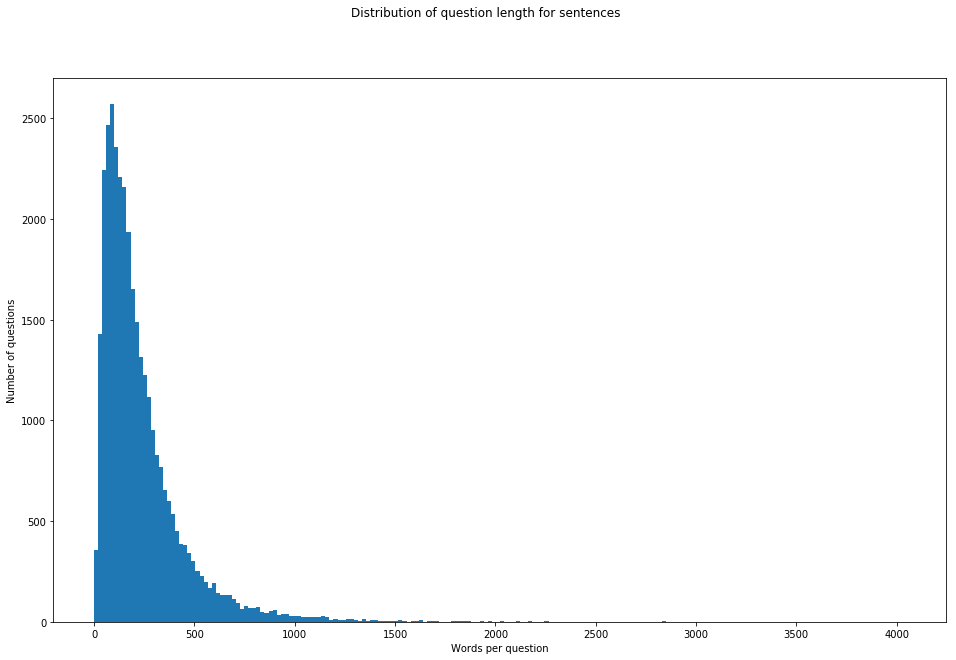

In [16]:
fig = plt.figure(figsize=(16,10))
fig.suptitle('Distribution of question length for sentences')
plt.xlabel('Words per question')
plt.ylabel('Number of questions')
q_len = plt.hist(df["text_len"],  bins=200,log=False)

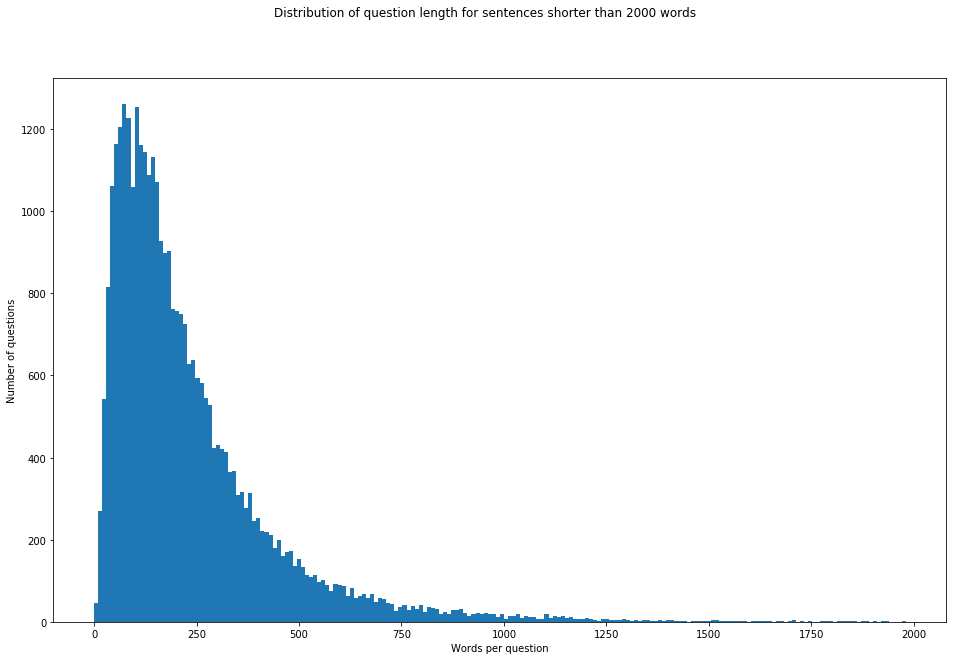

In [17]:
fig = plt.figure(figsize=(16,10))
fig.suptitle(
    'Distribution of question length for sentences shorter than 2000 words')
plt.xlabel('Words per question')
plt.ylabel('Number of questions')
q_len_trunc = plt.hist(df[df["text_len"]<2000]["text_len"], bins=200, log=False)

Text(0, 0.5, 'Percentage of sentences')

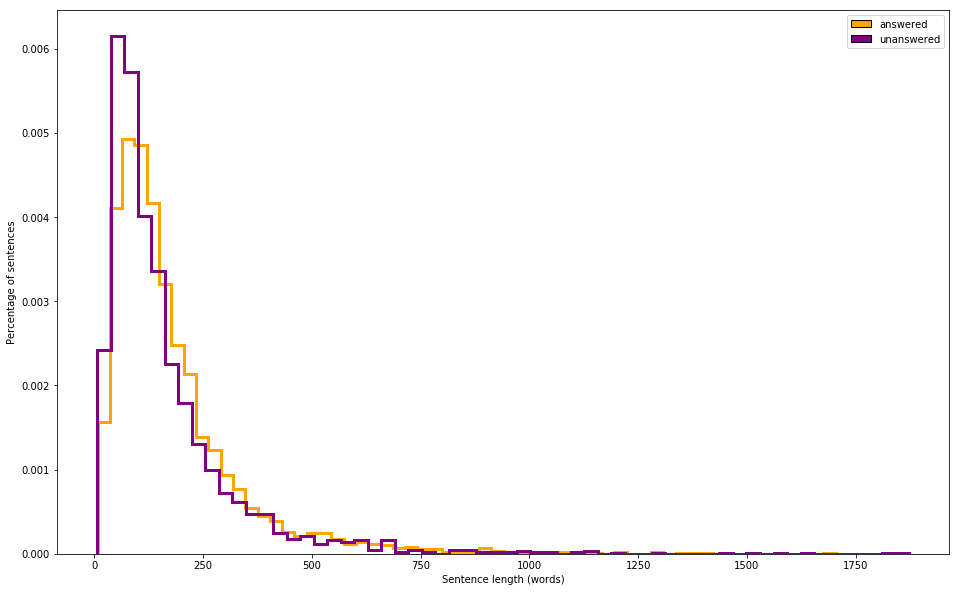

In [18]:
from matplotlib.patches import Rectangle

ax = df[df["is_question"] &
        ~(df["AcceptedAnswerId"].isna()) &
        (df["text_len"] < 2000)]["text_len"].hist(bins=60,
                                                          density=True,
                                                          histtype='step',
                                                          color='orange',
                                                          linewidth=3,
                                                          grid=False,
                                                          figsize=(16, 10))

df[df["is_question"] &
   (df["AcceptedAnswerId"].isna()) &
   (df["text_len"] < 2000)]["text_len"].hist(bins=60,
                                                     density=True,
                                                     histtype='step',
                                                     color='purple',
                                                     linewidth=3,
                                                     grid=False)

handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in
           ['orange', 'purple']]
labels = ["answered", "unanswered"]
plt.legend(handles, labels)
ax.set_xlabel("Sentence length (words)")
ax.set_ylabel("Percentage of sentences")

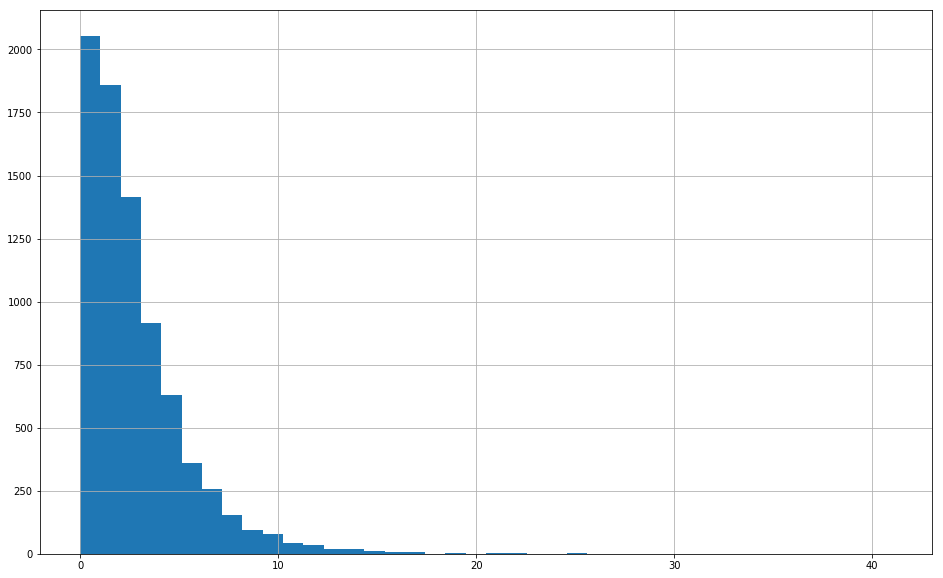

In [19]:
# Distribution of numbe rof answers
hist = df[df["is_question"]]["AnswerCount"].hist(bins=40, figsize=(16, 10))

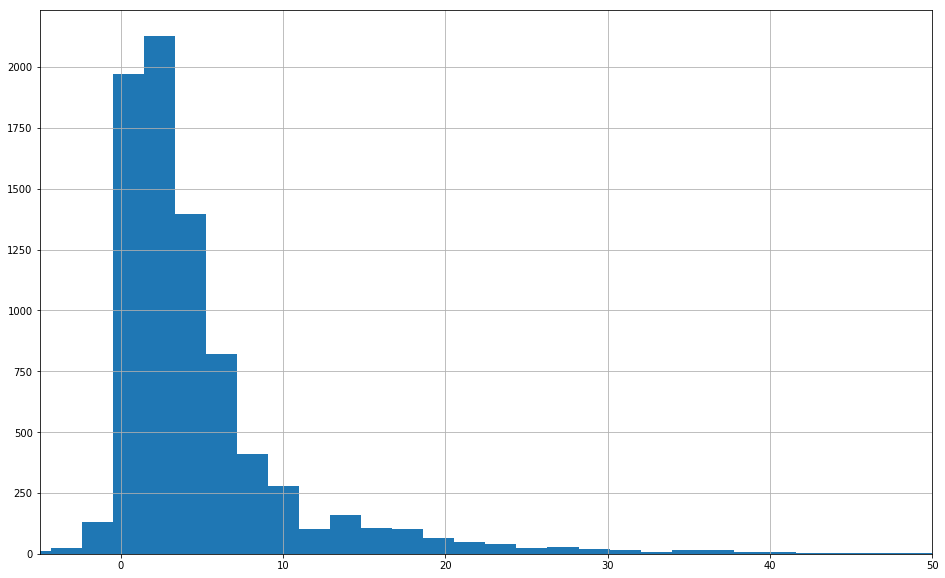

In [20]:
# Most question scores are under 10

plt.xlim(-5,50)
ax = df[df["is_question"]]["Score"].hist(bins=100, figsize=(16, 10))

Text(0, 0.5, 'Percentage of sentences')

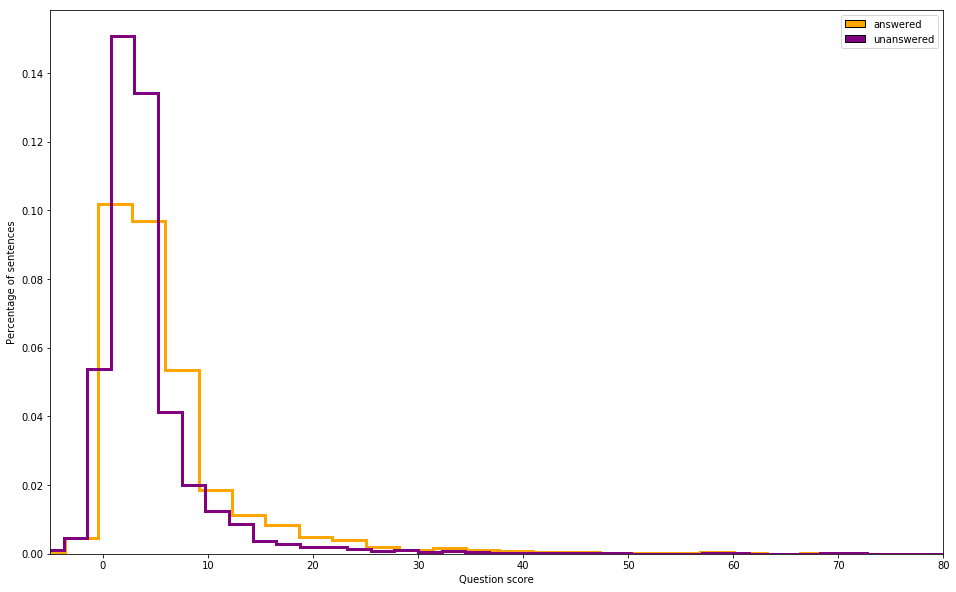

In [21]:
from matplotlib.patches import Rectangle
plt.xlim(-5,80)

ax = df[df["is_question"] &
        ~(df["AcceptedAnswerId"].isna())]["Score"].hist(bins=60,
                                                          density=True,
                                                          histtype='step',
                                                          color='orange',
                                                          linewidth=3,
                                                          grid=False,
                                                          figsize=(16, 10))

df[df["is_question"] &
   (df["AcceptedAnswerId"].isna())]["Score"].hist(bins=60,
                                                     density=True,
                                                     histtype='step',
                                                     color='purple',
                                                     linewidth=3,
                                                     grid=False)

handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in
           ['orange', 'purple']]
labels = ["answered", "unanswered"]
plt.legend(handles, labels)
ax.set_xlabel("Question score")
ax.set_ylabel("Percentage of sentences")

After this summary exploration, it is time to do a deeper dive!